<a href="https://colab.research.google.com/github/gustavo-felipe-martinez/EDP1-/blob/main/polinomios%20de%20legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grafica de los polinomios de legendre para n=1,2,3,4,5

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, factorial, legendre_poly, simplify, Eq, expand
from scipy.special import legendre

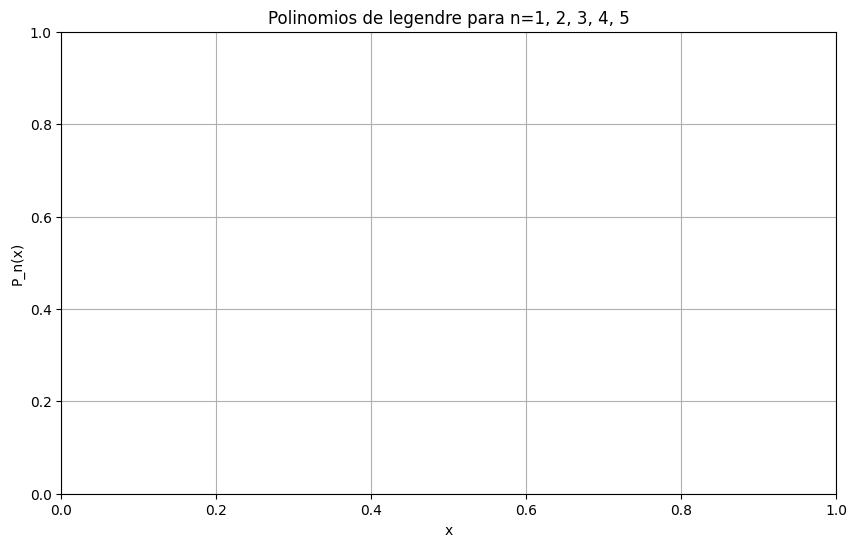

In [29]:
x=symbols('x')
plt.figure(figsize=(10, 6))
plt.title('Polinomios de legendre para n=1, 2, 3, 4, 5')
plt.xlabel('x')
plt.ylabel('P_n(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


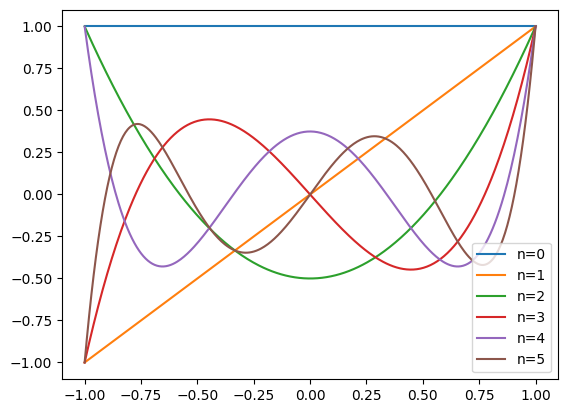

In [30]:
x_vals=np.linspace(-1,1,400)
for n in range(6):
  P_n=legendre(n)
  y_vals=P_n(x_vals)
  plt.plot(x_vals,y_vals, label=f'n={n}')
plt.legend()
plt.show()

b)Relacion grafica

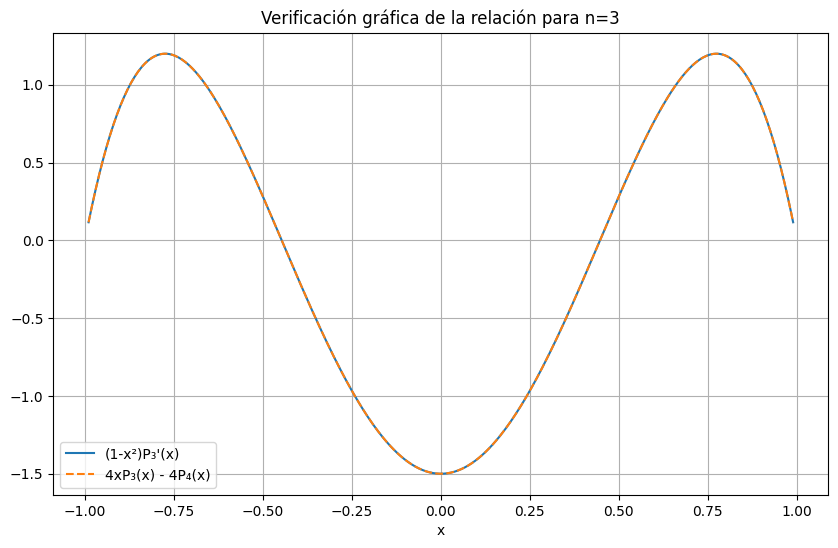

In [31]:
n = 3
x_vals = np.linspace(-0.99, 0.99, 400)  # Evitamos x=±1 por la división por cero

# Calcular los polinomios necesarios
P3 = legendre(3)
P4 = legendre(4)
dP3 = P3.deriv()

# Lado izquierdo de la ecuación: (1-x²)P₃'(x)
left_side = (1 - x_vals**2) * dP3(x_vals)

# Lado derecho: (n+1)xPₙ(x) - (n+1)Pₙ₊₁(x) = 4xP₃(x) - 4P₄(x)
right_side = (n+1)*x_vals*P3(x_vals) - (n+1)*P4(x_vals)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x_vals, left_side, label='(1-x²)P₃\'(x)')
plt.plot(x_vals, right_side, '--', label='4xP₃(x) - 4P₄(x)')
plt.title('Verificación gráfica de la relación para n=3')
plt.xlabel('x')
plt.grid(True)
plt.legend()
plt.show()

c)Relacion algebraica

In [32]:
n = 3
x = symbols('x')

# Definir los polinomios de Legendre
P3 = legendre_poly(n, x)
P4 = legendre_poly(n+1, x)

# Calcular la derivada
dP3 = diff(P3, x)

# Lado izquierdo
left = (1 - x**2) * dP3

# Lado derecho
right = (n+1)*x*P3 - (n+1)*P4

# Simplificar la diferencia para verificar igualdad
verification = simplify(left - right)

print("Lado izquierdo:", left)
print("Lado derecho:", right)
print("Diferencia simplificada:", verification)

Lado izquierdo: (1 - x**2)*(15*x**2/2 - 3/2)
Lado derecho: -35*x**4/2 + 15*x**2 + 4*x*(5*x**3/2 - 3*x/2) - 3/2
Diferencia simplificada: 0


c)Formula de rodrigues

In [35]:
def rodrigues_formula(n):
    return 1/(2*n * factorial(n)) * diff((x**2 - 1)*n, x, n)

print("Verificación de la fórmula de Rodrigues:")
for n in range(6):
    P_n = legendre_poly(n, x)
    P_rodrigues = expand(rodrigues_formula(n))
    print(f"n={n}:")
    print("Polinomio de Legendre:", P_n)
    print("Fórmula de Rodrigues:", P_rodrigues)
    print("¿Son iguales?", simplify(P_n - P_rodrigues) == 0)
    print()

Verificación de la fórmula de Rodrigues:
n=0:
Polinomio de Legendre: 1
Fórmula de Rodrigues: nan
¿Son iguales? False

n=1:
Polinomio de Legendre: x
Fórmula de Rodrigues: x
¿Son iguales? True

n=2:
Polinomio de Legendre: 3*x**2/2 - 1/2
Fórmula de Rodrigues: 1/2
¿Son iguales? False

n=3:
Polinomio de Legendre: 5*x**3/2 - 3*x/2
Fórmula de Rodrigues: 0
¿Son iguales? False

n=4:
Polinomio de Legendre: 35*x**4/8 - 15*x**2/4 + 3/8
Fórmula de Rodrigues: 0
¿Son iguales? False

n=5:
Polinomio de Legendre: 63*x**5/8 - 35*x**3/4 + 15*x/8
Fórmula de Rodrigues: 0
¿Son iguales? False

